In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
import numpy as np
import pandas as pd
%matplotlib inline

Text(0, 0.5, 'Viagra')

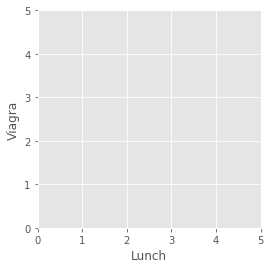

In [3]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_xlim(0, 5)
ax.set_xlabel('Lunch')
ax.set_ylim(0, 5)
ax.set_ylabel('Viagra')


In [4]:
documents = [
    """From: Martha Washington <marthafirst@hotmail.com>
Subject: Lunch
Date: January 25, 1794 9:30:58 AM EST
To: George Washington <president@whitehouse.gov>

Looking forward to lunch at noon today. I reserved my MealPal at Nerds and Nibblers. Please don't forget to book yours. You know how much I hate standing in line.

 xoxo Martha 😻
""",
    """From: Aaron Burr <aabear@aol.com>
Subject: Quality meds, low price, quick delivery!
Date: January 25, 1794 9:35:21 AM EST
To: George Washington <president@whitehouse.gov>

Not dead yet? We have the Viagra that you need!!!

GUARANTEED BEST PRICE VIAGRA! WE HAVE QUICKSILVER TOO!!!

CLICK HERE FOR VIAGRA! ORDER NOW!
http://legit-pharmacy.ru/viagra-deals?ref=aabear

""",
    
]

In [5]:
len(documents)

2

In [6]:
vocab = ['lunch', 'viagra']

In [24]:
doc = documents[0]
doc

"From: Martha Washington <marthafirst@hotmail.com>\nSubject: Lunch\nDate: January 25, 1794 9:30:58 AM EST\nTo: George Washington <president@whitehouse.gov>\n\nLooking forward to lunch at noon today. I reserved my MealPal at Nerds and Nibblers. Please don't forget to book yours. You know how much I hate standing in line.\n\n xoxo Martha 😻\n"

### Steps to Vectorize Text (brainstormed in class)

* Convert the string to lowercase
* Split the string into words
* Initialize something to store word counts
* Tell it what words to look for
* Count those words in each email

In [10]:
from string import punctuation
from collections import Counter
import pandas as pd

In [11]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
def replace_punctuation_with_spaces(text):
    """Return text with all punctuation turned into spaces."""
    output = ''
    for char in text:
        if char in punctuation:
            char = ' '
        output += char
    return output

In [13]:
[replace_punctuation_with_spaces(doc) for doc in documents]

['From  Martha Washington  marthafirst hotmail com \nSubject  Lunch\nDate  January 25  1794 9 30 58 AM EST\nTo  George Washington  president whitehouse gov \n\nLooking forward to lunch at noon today  I reserved my MealPal at Nerds and Nibblers  Please don t forget to book yours  You know how much I hate standing in line \n\n xoxo Martha 😻\n',
 'From  Aaron Burr  aabear aol com \nSubject  Quality meds  low price  quick delivery \nDate  January 25  1794 9 35 21 AM EST\nTo  George Washington  president whitehouse gov \n\nNot dead yet  We have the Viagra that you need   \n\nGUARANTEED BEST PRICE VIAGRA  WE HAVE QUICKSILVER TOO   \n\nCLICK HERE FOR VIAGRA  ORDER NOW \nhttp   legit pharmacy ru viagra deals ref aabear\n\n']

In [14]:
def tokenize(doc, vocab=vocab):
    """Return a list of words in text."""
    text = replace_punctuation_with_spaces(doc.lower())
    words = [word for word in text.split() if word in vocab]
    return words

In [15]:
corpus = [tokenize(doc) for doc in documents]

In [25]:
def vectorize(corpus):
    """Return a DataFrame of the corpus."""
    return pd.DataFrame([Counter(doc) for doc in corpus]).fillna(0)

In [26]:
vectorize(corpus)

,lunch,viagra
0,2.0,0.0
1,0.0,4.0


In [18]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
cv = CountVectorizer()  # Optionally: vocabulary=['lunch', 'viagra']
cv.fit(documents)
data = cv.transform(documents).toarray()

In [27]:
# cv.vocabulary_  # e.g. {'from': 26, 'martha': 44, ...}

In [28]:
cols = [x[0] for x in sorted(cv.vocabulary_.items(), key=lambda x: x[0])]
data = pd.DataFrame(data, columns=cols)

In [29]:
data

,1794,21,25,30,35,58,aabear,aaron,am,and,...,today,too,viagra,washington,we,whitehouse,xoxo,yet,you,yours
0,1,0,1,1,0,1,0,0,1,1,...,1,0,0,2,0,1,1,0,1,1
1,1,1,1,0,1,0,2,1,1,0,...,0,1,4,1,2,1,0,1,1,0


In [30]:
data.loc[:, ['lunch', 'viagra']]

,lunch,viagra
0,2,0
1,0,4
